In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
from utils import correlacao_dados,treinar_modelo_tree


In [2]:
path_data_final = 'data/processing/mergin_data_final.parquet'

In [3]:
base_final_dev = pd.read_parquet(path_data_final)

In [4]:
base_final_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73477 entries, 0 to 73476
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_CLIENTE                   73477 non-null  int64  
 1   DATA_CADASTRO                73477 non-null  object 
 2   DDD                          73477 non-null  int64  
 3   FLAG_PF                      73477 non-null  int64  
 4   SEGMENTO_INDUSTRIAL          73477 non-null  int64  
 5   DOMINIO_EMAIL                73477 non-null  int64  
 6   PORTE                        73477 non-null  int64  
 7   CEP_2_DIG                    73477 non-null  int64  
 8   ANO_CADASTRO                 73477 non-null  object 
 9   SAFRA_REF                    73477 non-null  object 
 10  DATA_EMISSAO_DOCUMENTO       73477 non-null  object 
 11  DATA_PAGAMENTO               73477 non-null  object 
 12  DATA_VENCIMENTO              73477 non-null  object 
 13  VALOR_A_PAGAR   

In [5]:
colunas= ['VALOR_A_PAGAR', 'TAXA', 'QTD_DIAS_EMISSAO_VENCIMENTO','RENDA_MES_ANTERIOR',
          'NO_FUNCIONARIOS','DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL',
          'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG','DIAS_ATRASO','TARGET']

In [7]:
y = base_final_dev['TARGET']
fields = colunas[:-1] 
correlations = base_final_dev[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

VALOR_A_PAGAR                 -0.087139
RENDA_MES_ANTERIOR            -0.068325
NO_FUNCIONARIOS               -0.016162
CEP_2_DIG                     -0.016090
DOMINIO_EMAIL                 -0.009111
TAXA                           0.011129
PORTE                          0.014876
FLAG_PF                        0.025714
DDD                            0.056356
SEGMENTO_INDUSTRIAL            0.071591
QTD_DIAS_EMISSAO_VENCIMENTO    0.107061
DIAS_ATRASO                    0.212127
dtype: float64

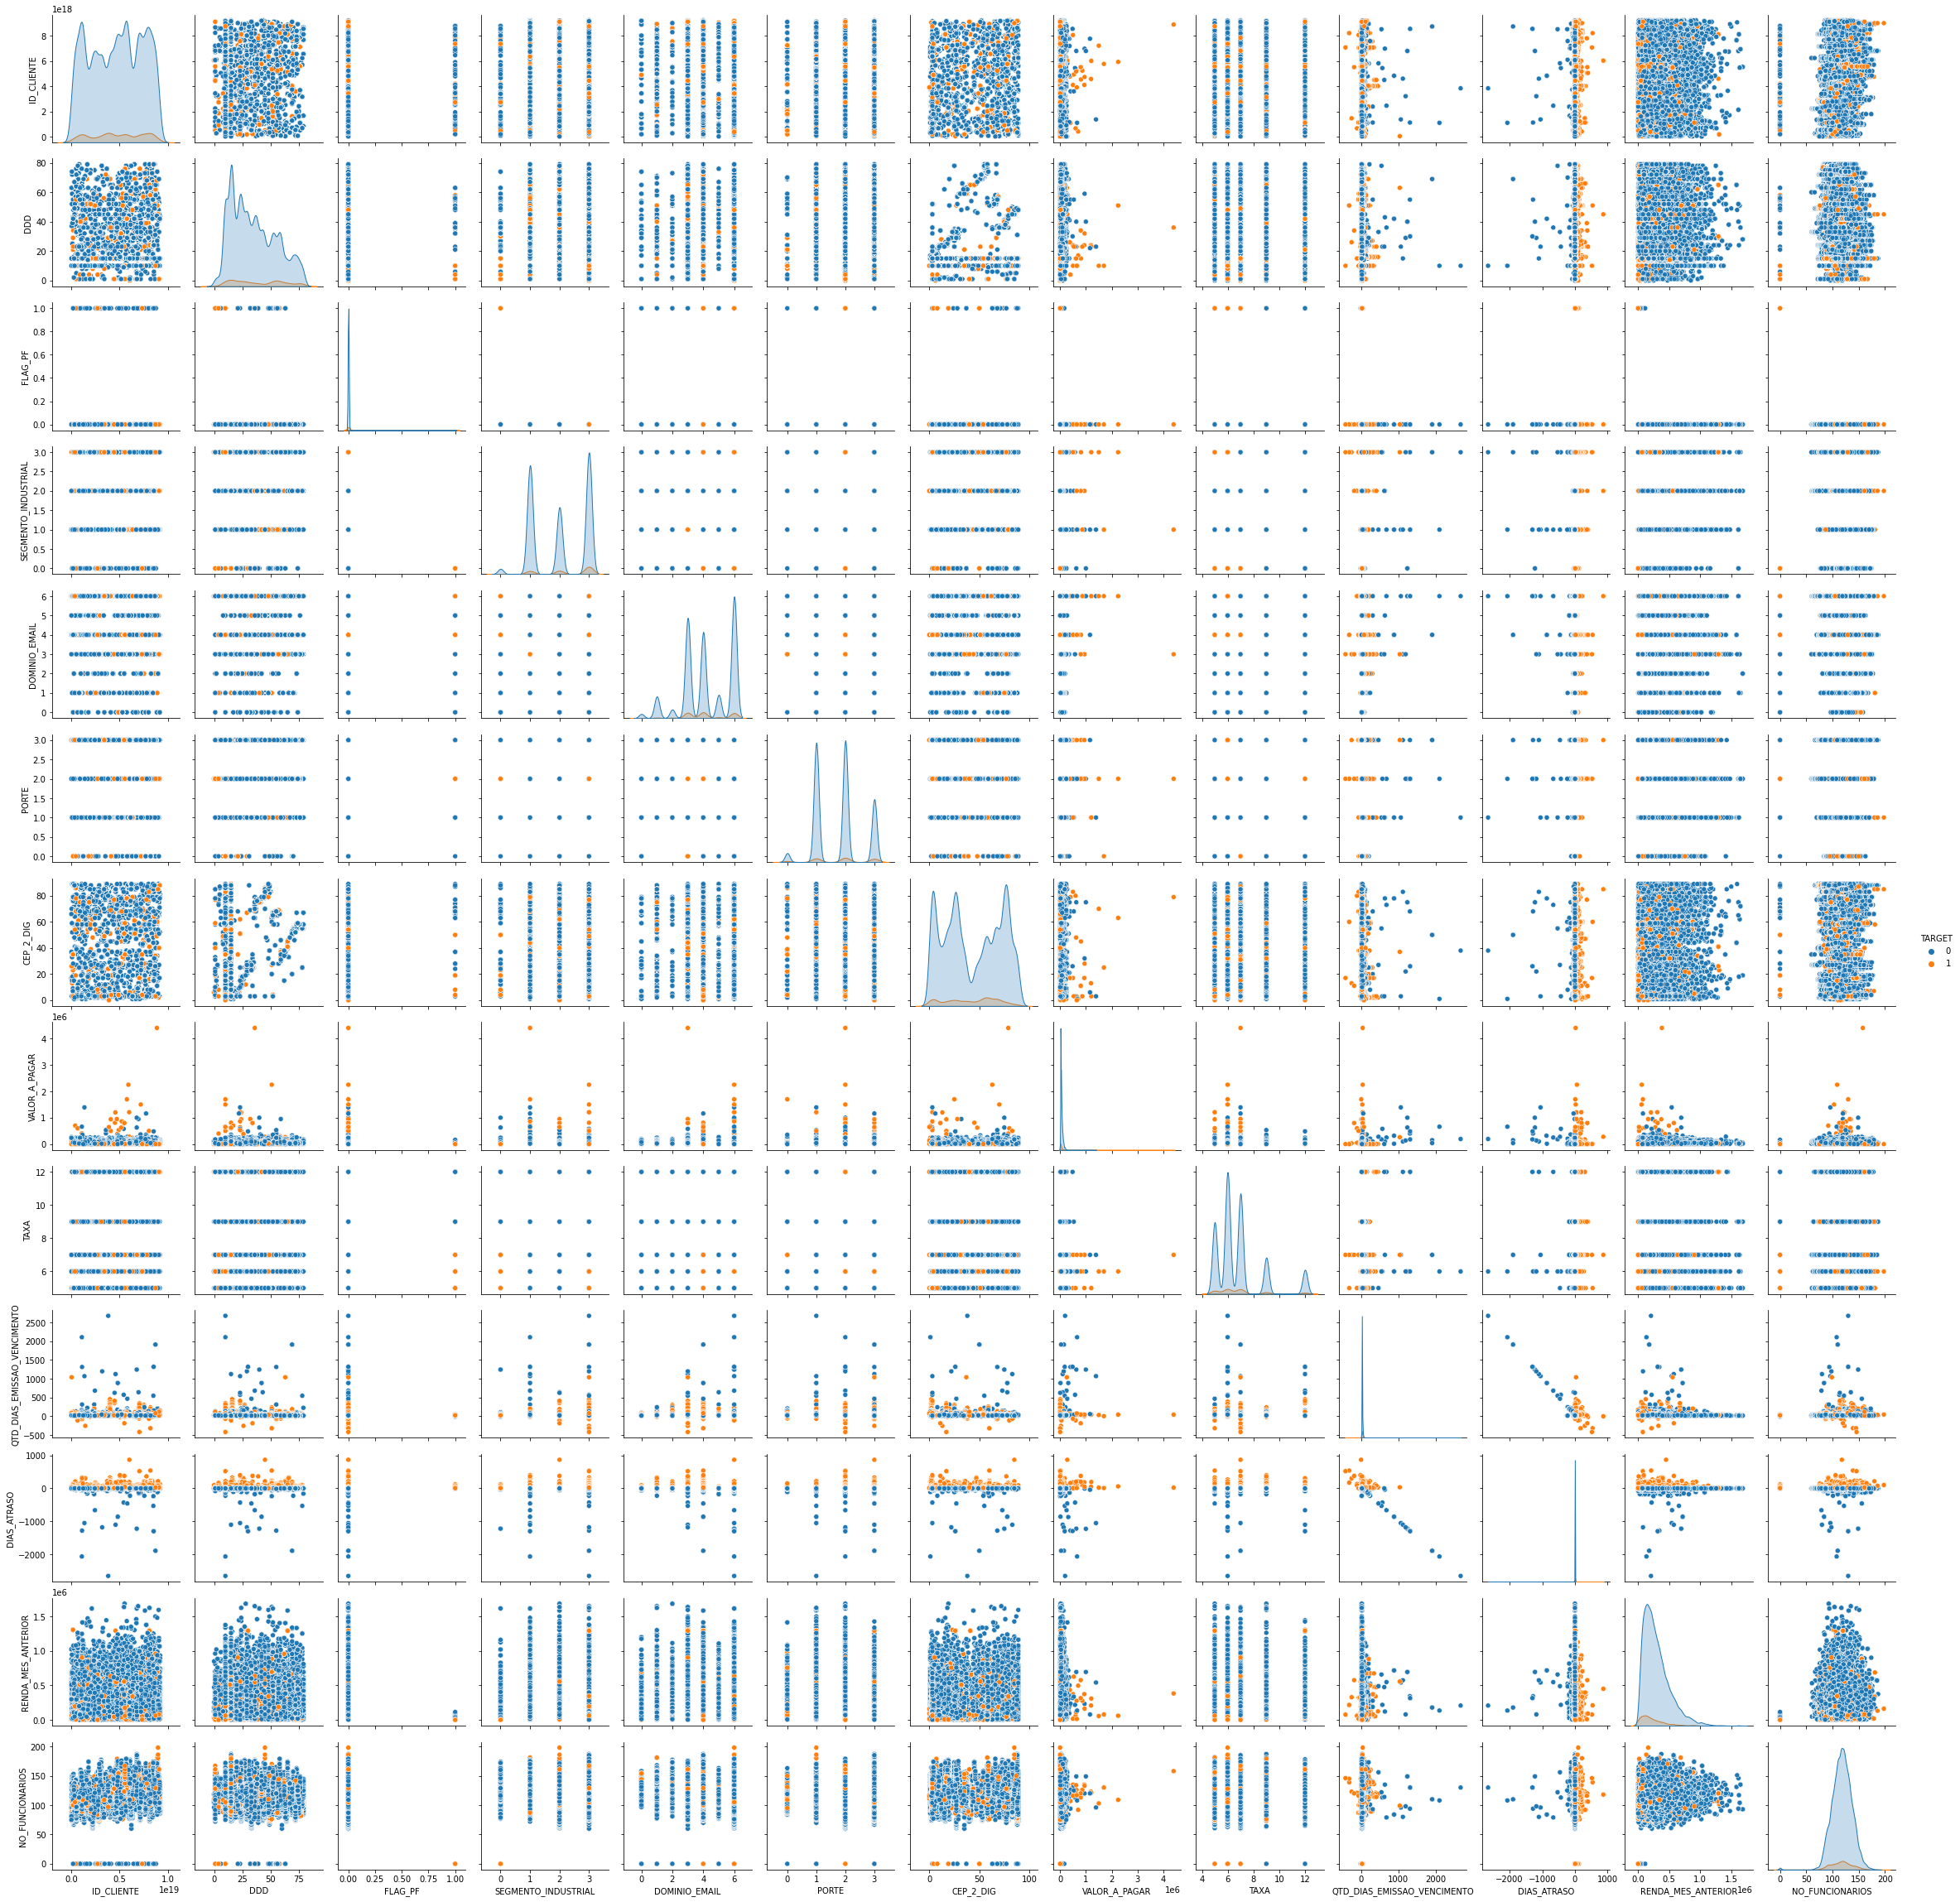

In [ ]:
sns.pairplot(base_final_dev, hue='TARGET')

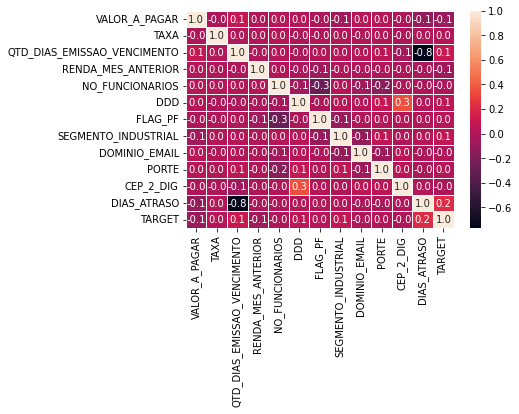

In [8]:
correlacao_dados(base_final_dev,colunas)

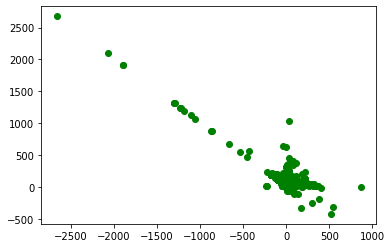

In [15]:
import matplotlib.pyplot as plt 
x=base_final_dev['DIAS_ATRASO']
y=base_final_dev['QTD_DIAS_EMISSAO_VENCIMENTO']

plt.scatter(x,y,c='g')